# Credit_card_fraud_detection 

### Importing libraries

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")

In [32]:
import os 
os.getcwd()


'C:\\1JT21AI023_Suhail'

#### Data loading

In [33]:
df = pd.read_csv('datasets\\creditcard_2023.csv')

### Descriptive analysis


To get first 5 rows of the data

In [34]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [35]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

* the transactions have undergone normalization (V1-V28) from 0(mean) to 1(std).
* the class column has 0 and 1 referring to binary classification 

To get last 5 rows of data

In [36]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


* The columns 'V1' through 'V28' seem to be anonymized numerical features with varying ranges and distributions.
* The 'Amount' column represents the transaction amount and appears to vary significantly between different transactions.
* The 'Class' column is the target variable indicating whether the transaction is fraudulent (Class = 1) or non-fraudulent (Class = 0).
* The 'id' column seems to be a unique identifier for each transaction but may not hold predictive value for fraud detection models.

To get number of rows & columns 

In [37]:
df.shape

(568630, 31)

* The dataset contains 568630 rows and 31 columns

To get the information about the values of dataframe

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

* The dataset contains 568,630 transactions, each with 30 anonymized numerical features (V1-V28), 'Amount', and a 'Class' label.
* All columns have complete data without any missing values, ensuring a consistent dataset.
* The 'Class' column serves as the target variable, denoting whether a transaction is fraudulent(1) or not(Class = 0).

To get all the column names

In [39]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

* All coulumn names are displayed

To get all the for all the the transaction columns

In [40]:
# What is the mean transaction amount?
df.mean()

id        2.843145e+05
V1       -5.638058e-17
V2       -1.319545e-16
V3       -3.518788e-17
V4       -2.879008e-17
V5        7.997245e-18
V6       -3.958636e-17
V7       -3.198898e-17
V8        2.109273e-17
V9        3.998623e-17
V10       1.991314e-16
V11      -1.183592e-16
V12      -5.758017e-17
V13      -5.698037e-18
V14      -4.078595e-17
V15       2.649087e-17
V16      -1.719408e-17
V17      -3.398829e-17
V18      -5.837989e-17
V19       2.479146e-17
V20      -1.579456e-17
V21       4.758361e-17
V22       3.948640e-18
V23       6.194741e-18
V24      -2.799036e-18
V25      -3.178905e-17
V26      -7.497417e-18
V27      -3.598760e-17
V28       2.609101e-17
Amount    1.204196e+04
Class     5.000000e-01
dtype: float64

* Anonymized Features (V1-V28): These numerical attributes show mean values very close to zero, suggesting potential standardization or normalization for consistent scaling across different attributes.
* Class Distribution:
  Fraudulent vs. Non-Fraudulent Transactions: The 'Class' column indicates an equal mean split of 0.5 between fraudulent and     non-fraudulent transactions, but further exploration is necessary to validate the actual distribution.

To Check the missing values

In [41]:
# Are there any missing values in the dataset? If so, in which columns?
missing_values = df.isnull().sum()
missing_values

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* Zero missing values in the dataset, which means the data is complete

In [42]:
# 2. How many unique values are there in each categorical column?
df.nunique()

id        568630
V1        552035
V2        552035
V3        552035
V4        552035
V5        552035
V6        552035
V7        552035
V8        552035
V9        552035
V10       552035
V11       552035
V12       552035
V13       552035
V14       552035
V15       552035
V16       552035
V17       552035
V18       552035
V19       552035
V20       552035
V21       552035
V22       552035
V23       552035
V24       552035
V25       552035
V26       552035
V27       552035
V28       552035
Amount    506485
Class          2
dtype: int64

ID Column: Each transaction is uniquely identified by an ID, with no duplicates across 568,630 entries.

Anonymized Features (V1-V28): These features exhibit a striking similarity, each having approximately 552,035 identical values. This suggests a potential issue with diversity or transformation, demanding further investigation.

Transaction Amount (Amount): There are 506,485 distinct transaction amounts recorded, indicating a varying range of transaction values.

Class Label: The 'Class' column shows two unique values, likely representing a binary classification for fraudulent (1) and non-fraudulent (0) transactions.

To get all the statistical data of each columns

In [43]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


* Count: all columns have no missing values
* The anonymized features (V1-V28) appear to be normalized, centered around zero, and standardized with a standard deviation of 1


In [44]:
df.isnull().any()

id        False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [45]:
# what is the range of the amount?
min_amount = df['Amount'].min()
max_amount = df['Amount'].max()

transaction_range = max_amount - min_amount

print(f"Minimum Transaction Amount: {min_amount}")
print(f"Maximum Transaction Amount: {max_amount}")
print(f"Range of Transaction Amounts: {transaction_range}")


Minimum Transaction Amount: 50.01
Maximum Transaction Amount: 24039.93
Range of Transaction Amounts: 23989.920000000002


It shows the spread of transaction amount

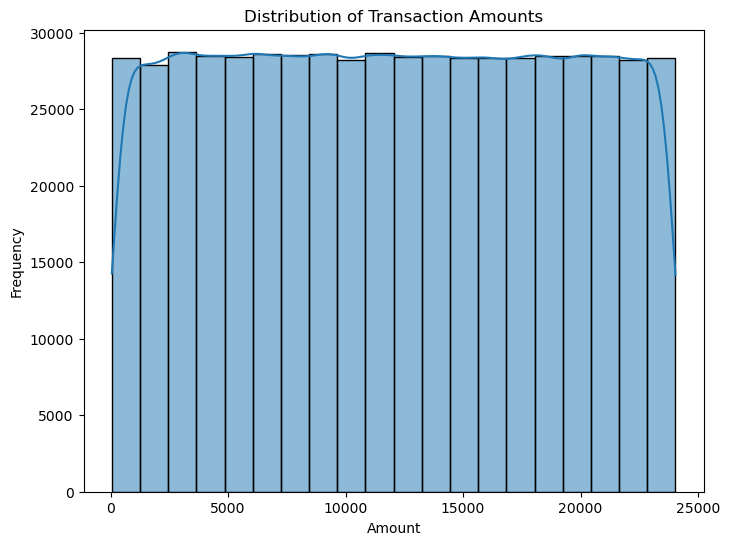

In [46]:
#Distribution of Transaction Amounts
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

* the graph is normally distributed

To detect outliers

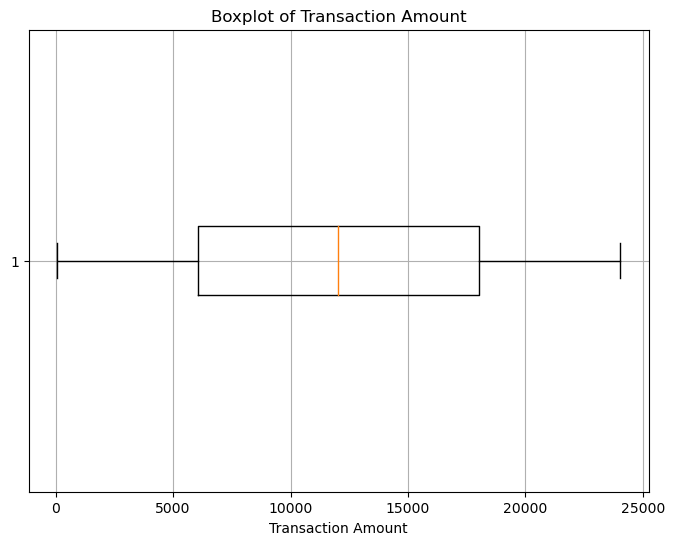

In [47]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Amount'], vert=False)
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount')
plt.grid(True)
plt.show()


* there are no outliers in this dataset

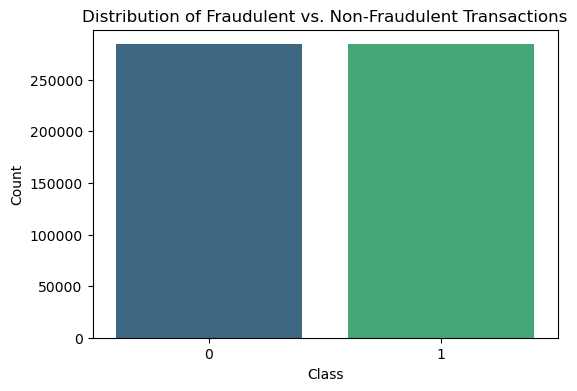

Class
0    284315
1    284315
Name: count, dtype: int64


In [48]:
# Counting the occurrences of each class
class_counts = df['Class'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

# Displaying the counts
print(class_counts)


* the number of fruadelent(1) and non-fraudelent(0) class is equal

To analyze pattern in column through visualization

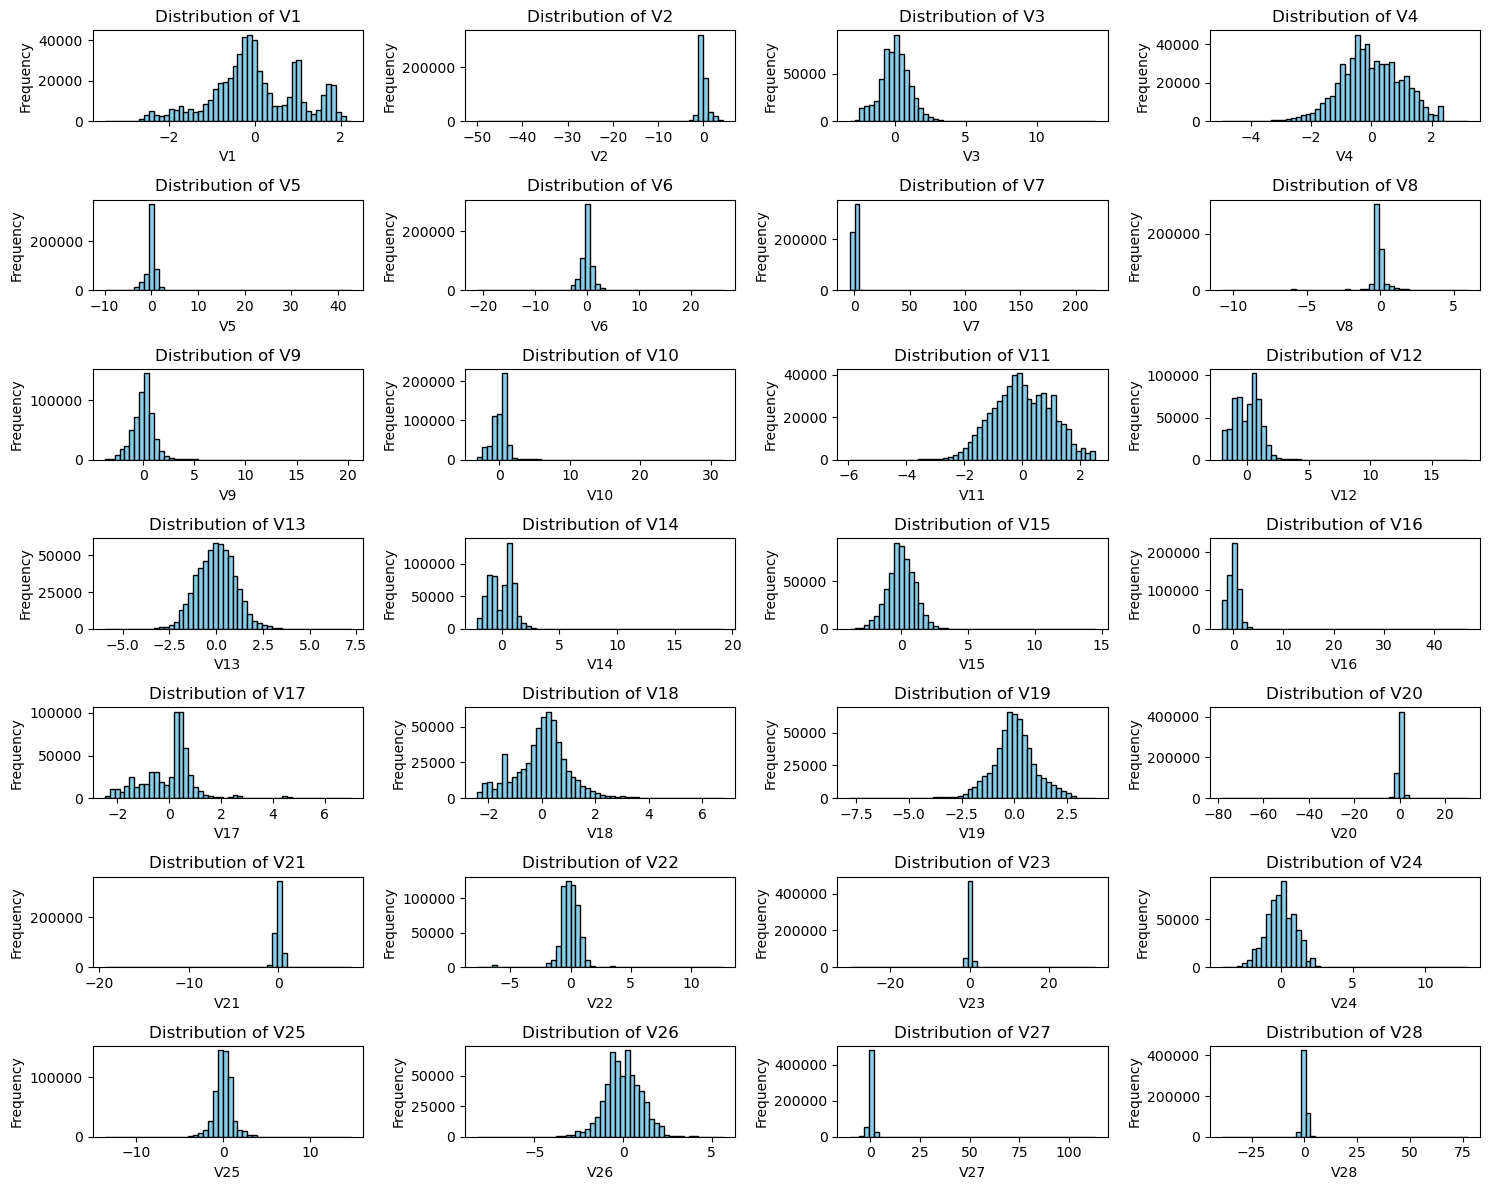

In [49]:
# Feature Distributions (V1-V28): Examine the distributions of the anonymized features. Do they follow any specific pattern?

# Selecting only the anonymized features V1-V28
anonymized_features = df.iloc[:, 1:29]  # Assuming features V1-V28 start from column 1 to 28

# Plotting histograms for each anonymized feature
plt.figure(figsize=(15, 12))
for i, column in enumerate(anonymized_features.columns):
    plt.subplot(7, 4, i + 1)  # Creating subplots for each feature
    plt.hist(anonymized_features[column], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


In [50]:
# Selecting features V1-V28 and the 'Class' column
selected_columns = df.iloc[:, 1:29]  # Assuming features V1-V28 start from column 1 to 28
selected_columns['Class'] = df['Class']

# Calculating the correlation matrix
correlation_matrix = selected_columns.corr()

# Displaying correlations with the 'Class' column
class_correlations = correlation_matrix['Class'].drop('Class')  # Dropping self-correlation with 'Class'
print("Correlations with 'Class' column:")
print(class_correlations)

# Displaying correlations among anonymized features
feature_correlations = correlation_matrix.drop('Class', axis=1).drop('Class', axis=0)
print("\nCorrelations among anonymized features:")
print(feature_correlations)


Correlations with 'Class' column:
V1    -0.505761
V2     0.491878
V3    -0.682095
V4     0.735981
V5    -0.338639
V6    -0.435088
V7    -0.491234
V8     0.144294
V9    -0.585522
V10   -0.673665
V11    0.724278
V12   -0.768579
V13   -0.071105
V14   -0.805669
V15   -0.037948
V16   -0.573511
V17   -0.476377
V18   -0.410091
V19    0.244081
V20    0.179851
V21    0.109640
V22    0.014098
V23    0.010255
V24   -0.130107
V25    0.061847
V26    0.071052
V27    0.214002
V28    0.102024
Name: Class, dtype: float64

Correlations among anonymized features:
           V1        V2        V3        V4        V5        V6        V7  \
V1   1.000000 -0.561184  0.484499 -0.498963  0.517462  0.354728  0.573381   
V2  -0.561184  1.000000 -0.627810  0.579638 -0.631669 -0.341040 -0.694022   
V3   0.484499 -0.627810  1.000000 -0.687726  0.510351  0.508974  0.634336   
V4  -0.498963  0.579638 -0.687726  1.000000 -0.429243 -0.474403 -0.588648   
V5   0.517462 -0.631669  0.510351 -0.429243  1.000000  0.245187 

* correlation of features with class:
   * Features (V2, V4, V8, V11, V19, V20, V21, V22, V23, V25, V26, V27, V28) have positive correlation with the class that means it is more likely to fraudalent
   * Features (V1, V3, V5, V6, V7, V9, V10, V12, V13, V15, V16, V17, V18, V24) have negative correlation with the class that means it is more likely to be non fraudalent
* Correlations among anonymized features:
   * Values close to 1 or -1 suggest a strong positive or negative correlation, respectively. Values closer to 0 indicate a weak correlation.
   * High correlations among features might indicate multicollinearity, where one feature can be linearly predicted from another, potentially impacting model performance.

To determine the skewness of each column

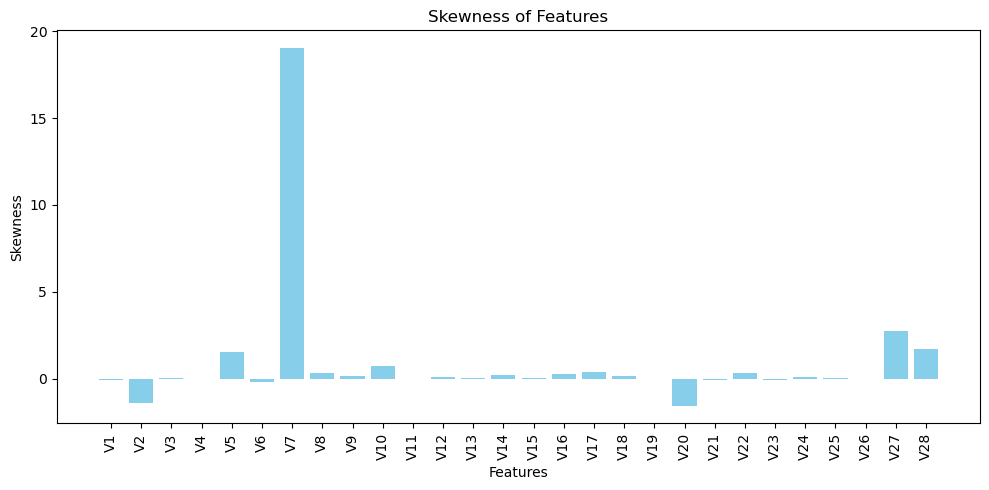

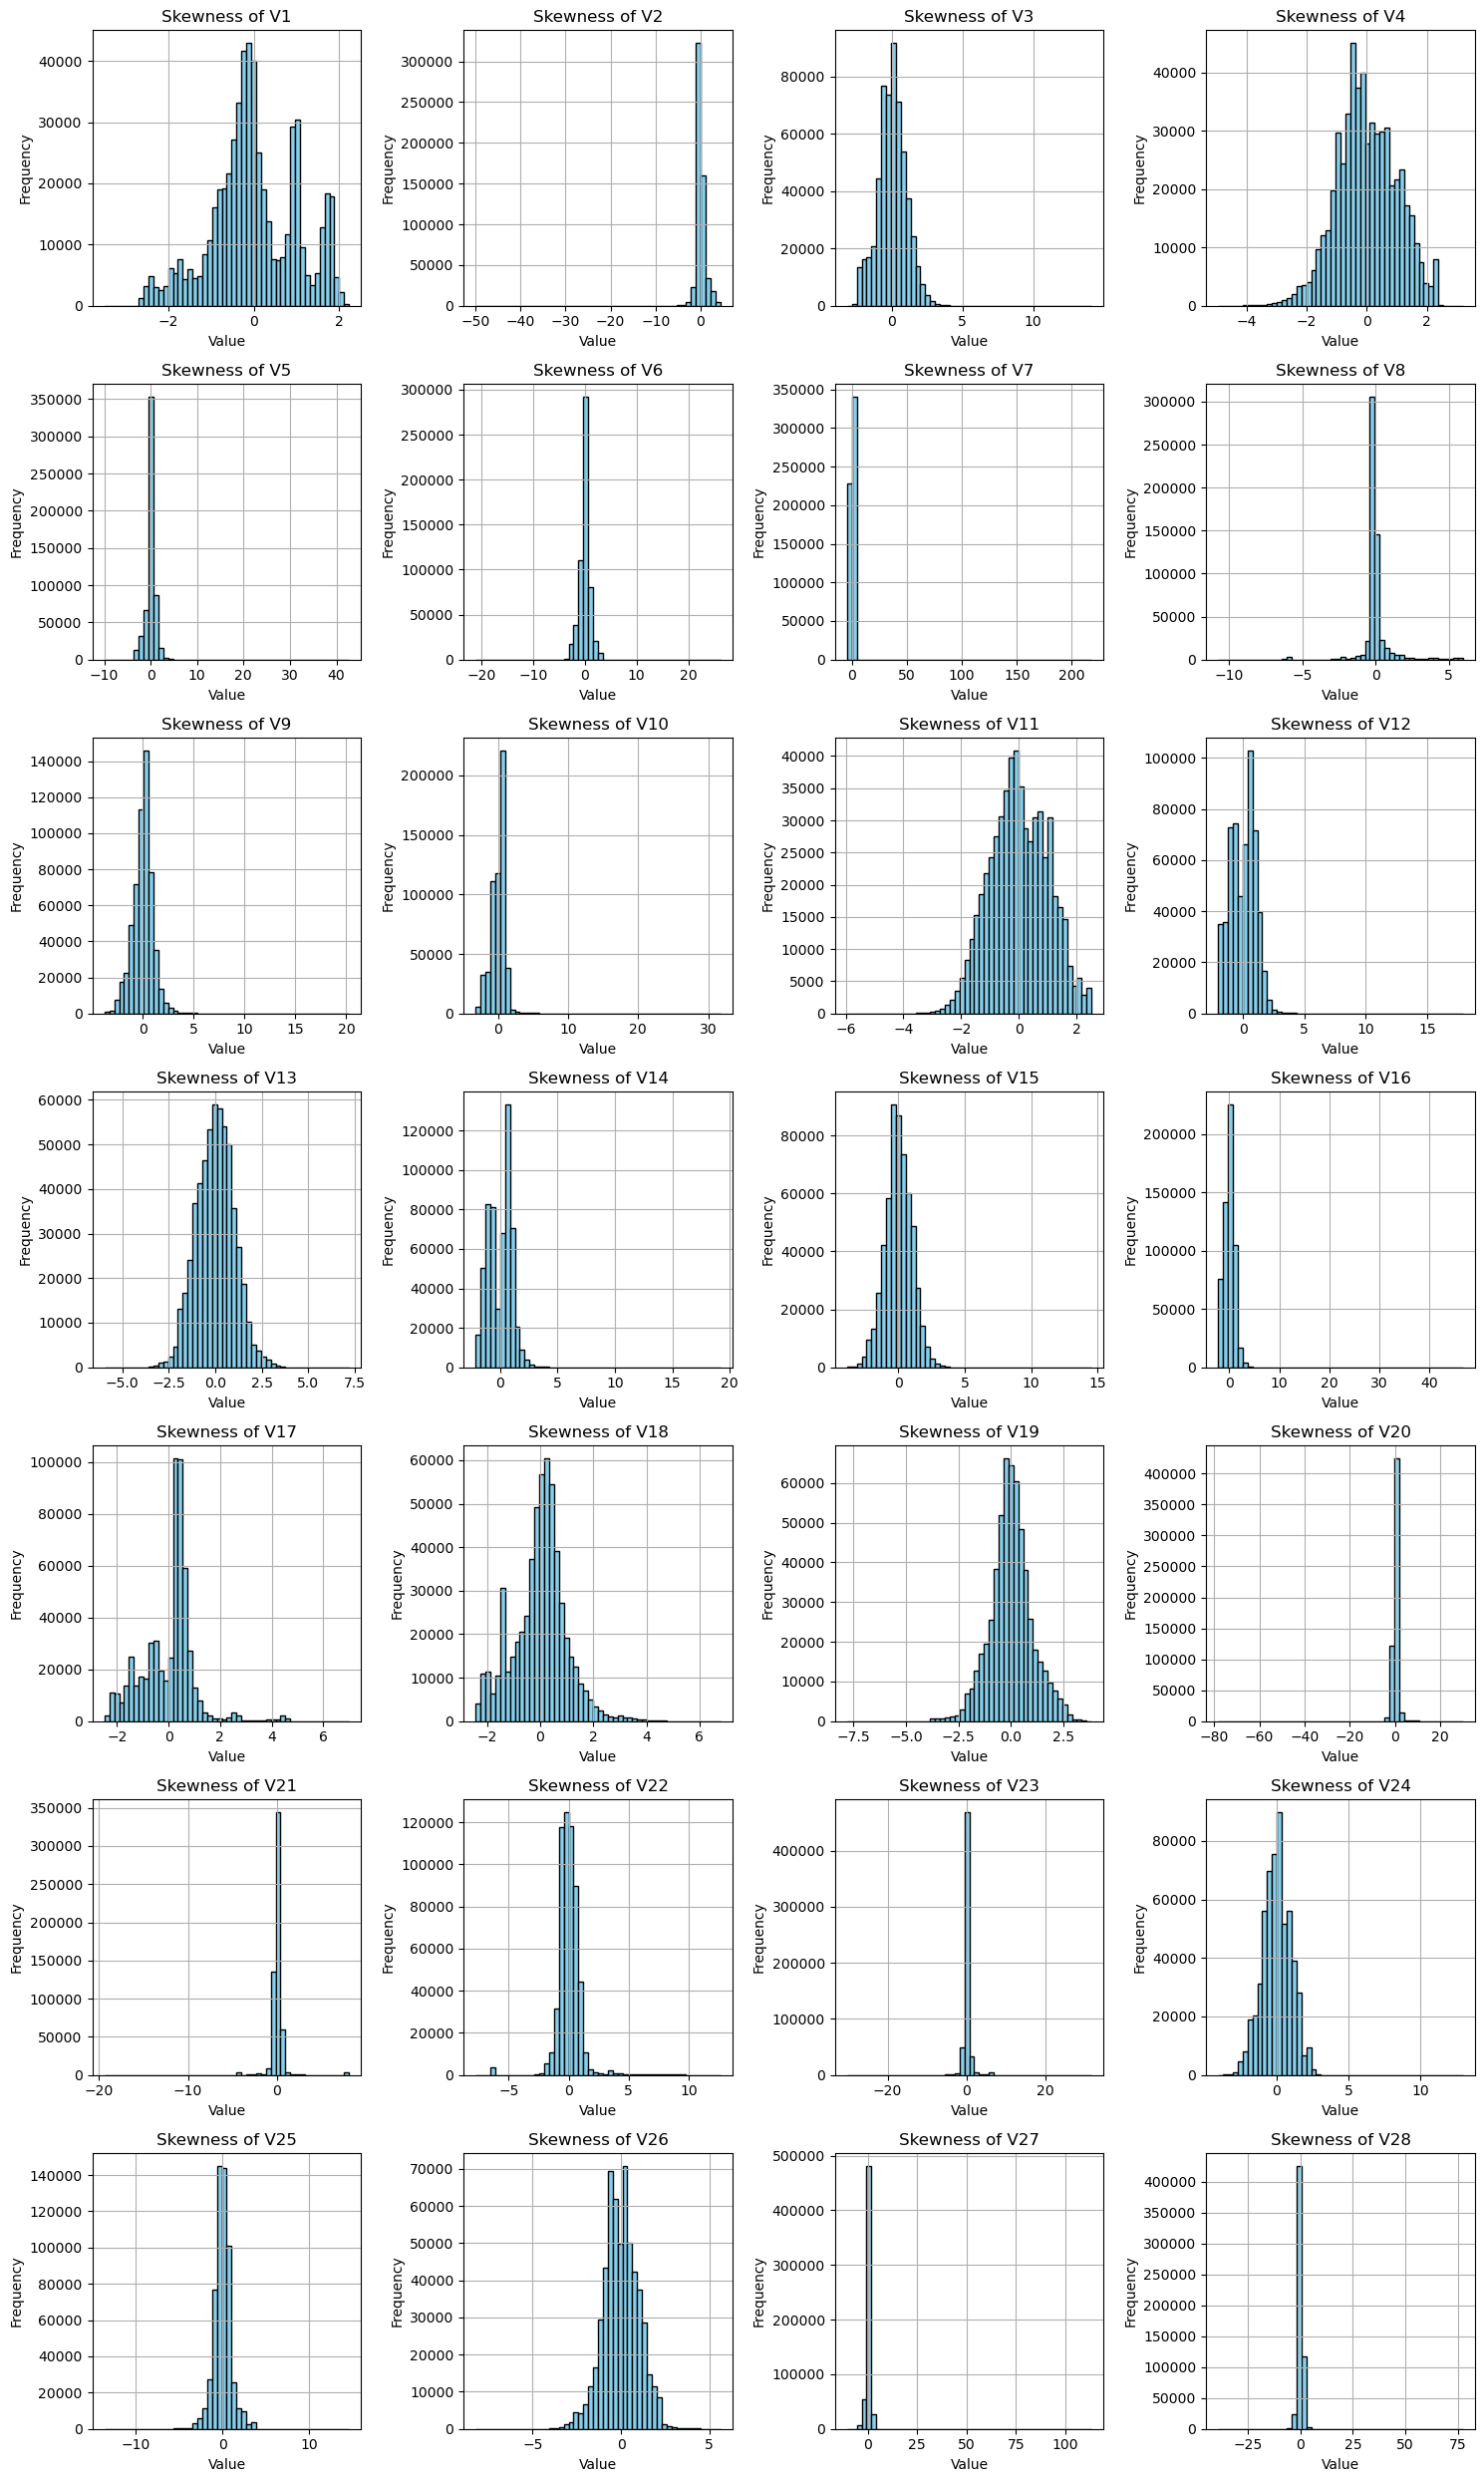

Skewness:
V1     -0.083417
V2     -1.397948
V3      0.014622
V4     -0.044169
V5      1.506410
V6     -0.201610
V7     19.026816
V8      0.299971
V9      0.171057
V10     0.740412
V11    -0.020891
V12     0.066759
V13     0.014906
V14     0.207834
V15     0.011233
V16     0.266406
V17     0.373060
V18     0.129191
V19    -0.010171
V20    -1.556456
V21    -0.108983
V22     0.318529
V23    -0.099687
V24     0.066090
V25     0.023008
V26    -0.018959
V27     2.755445
V28     1.724973
dtype: float64

Kurtosis:
V1       -0.195520
V2       54.505989
V3        0.288673
V4       -0.103364
V5       47.098927
V6        4.490460
V7     4017.572880
V8       18.939025
V9        3.639281
V10      13.164659
V11      -0.374937
V12      -0.213817
V13      -0.007787
V14       0.899445
V15       0.402158
V16       8.658536
V17       2.734274
V18       0.881346
V19       0.748172
V20     129.518625
V21      55.441903
V22      23.260462
V23      64.754184
V24       1.324820
V25       3.243720
V26       0.4

In [51]:
# Calculating skewness and kurtosis values
skewness_values = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                      'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].apply(skew)
kurtosis_values = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                      'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].apply(kurtosis)

# Plotting skewness
plt.figure(figsize=(10, 5))
plt.bar(skewness_values.index, skewness_values.values, color='skyblue')
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting skewness histograms for each feature
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
            'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(15, 25))
for i, feature in enumerate(features):
    plt.subplot(7, 4, i + 1)
    plt.hist(df[feature], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Skewness of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Displaying skewness and kurtosis values for each feature
print("Skewness:")
print(skewness_values)
print("\nKurtosis:")
print(kurtosis_values)


* skewness:
    * V1 to V26 have skewness around 0 which means symmetric distribution
    * V7, V20, V27, V28, V5 have high positive skew value indicating right skewed
    * V2 and V20 exhibit high negative skew value indicating left skewed
* kurtoise:
    * V2, V5, V7, V20, V21, V23, V27, V28 has heavy tail indicating outliers presence in their distribution
    

## Observation:
* The dataset contains 568,630 transactions with standardized numerical features (V1-V28) and two significant columns: 'Amount' and 'Class'. 
* 'Class' shows an equal split between fraudulent and non-fraudulent transactions, while 'Amount' varies considerably across transactions. 
* Certain features (like V2, V4, V8) correlate positively with fraud, while others (V1, V3, V5) have negative correlations.
* Most features display symmetric distributions, but specific ones like V7, V20 show right-skewed distributions, with some (V2, V5) having outliers. It suggests potential predictive power for fraud detection, yet caution is needed due to feature similarity, skewness, and outliers in the data.

### Bivariate analysis

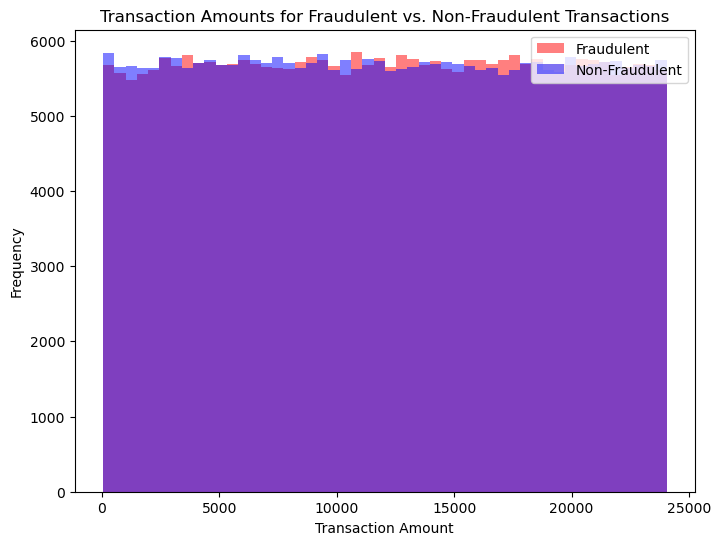

In [52]:
# How does the transaction amount differ between fraudulent and non-fraudulent transactions?
fraudulent_amounts = df[df['Class'] == 1]['Amount']
non_fraudulent_amounts = df[df['Class'] == 0]['Amount']

plt.figure(figsize=(8, 6))
plt.hist(fraudulent_amounts, bins=50, alpha=0.5, label='Fraudulent', color='red')
plt.hist(non_fraudulent_amounts, bins=50, alpha=0.5, label='Non-Fraudulent', color='blue')
plt.title('Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


To get strong correlation of features and class

In [53]:
#Are there any strong correlations between the anonymized features and the transaction Class?
correlation_with_class = df.corr()['Class'].drop('Class')
strong_correlations = correlation_with_class[abs(correlation_with_class) > 0.5]  # Assuming a strong correlation threshold

print("Strong Correlations with Class:")
print(strong_correlations)


Strong Correlations with Class:
id     0.864283
V1    -0.505761
V3    -0.682095
V4     0.735981
V9    -0.585522
V10   -0.673665
V11    0.724278
V12   -0.768579
V14   -0.805669
V16   -0.573511
Name: Class, dtype: float64


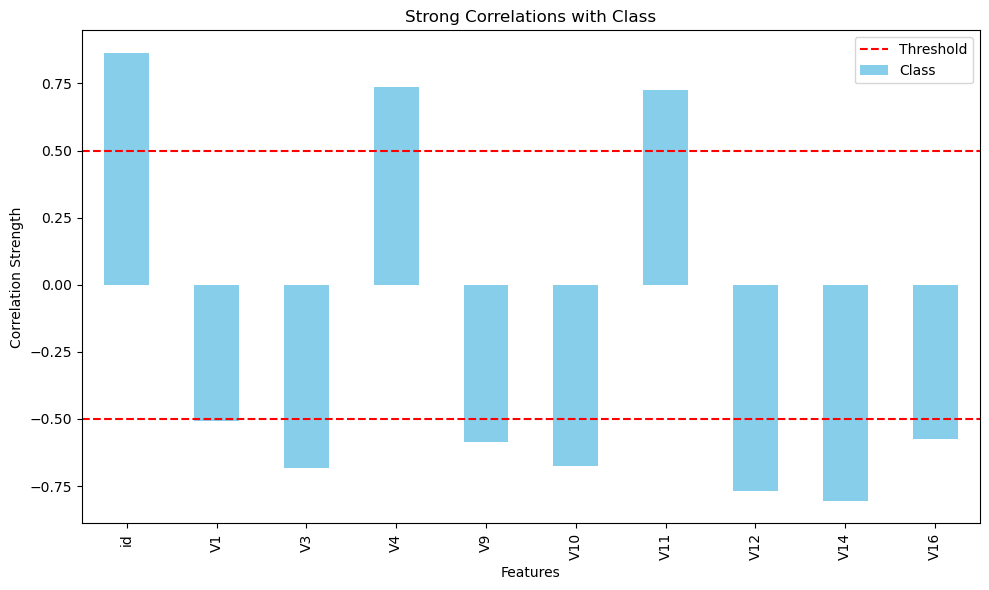

In [54]:
correlation_with_class = df.corr()['Class'].drop('Class')
strong_correlations = correlation_with_class[abs(correlation_with_class) > 0.5]  # Threshold for strong correlation

plt.figure(figsize=(10, 6))
strong_correlations.plot(kind='bar', color='skyblue')
plt.title('Strong Correlations with Class')
plt.xlabel('Features')
plt.ylabel('Correlation Strength')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-0.5, color='red', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


* Positive correlations (e.g., V4, V11) imply that higher values of these features might be associated with a higher likelihood of fraud. Conversely, negative correlations (e.g., V1, V3, V12) suggest that lower values might indicate non-fraudulent transactions.

In [55]:
# Selecting features and creating a subset for fraudulent transactions
fraudulent_data = df[df['Class'] == 1][['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                                       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

# Calculating correlation matrix for fraudulent transactions
correlation_matrix = fraudulent_data.corr()

# Filtering correlations above a certain threshold
threshold = 0.5
high_correlations = (correlation_matrix > threshold) & (correlation_matrix < 1.0)

# Displaying feature combinations with high correlations
combinations = {}
for feature in high_correlations.columns:
    correlated_features = high_correlations[feature][high_correlations[feature]].index.tolist()
    if len(correlated_features) > 1:
        combinations[feature] = correlated_features

# Displaying identified feature combinations with high correlations
for feature, correlated in combinations.items():
    print(f"Features correlated with '{feature}': {correlated}")


Features correlated with 'V1': ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V16', 'V17', 'V18']
Features correlated with 'V2': ['V4', 'V11']
Features correlated with 'V3': ['V1', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18']
Features correlated with 'V4': ['V2', 'V11']
Features correlated with 'V5': ['V1', 'V3', 'V7', 'V9', 'V10', 'V12', 'V16', 'V17', 'V18']
Features correlated with 'V7': ['V1', 'V3', 'V5', 'V9', 'V10', 'V12', 'V16', 'V17', 'V18']
Features correlated with 'V9': ['V1', 'V3', 'V5', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18']
Features correlated with 'V10': ['V1', 'V3', 'V5', 'V7', 'V9', 'V12', 'V14', 'V16', 'V17', 'V18']
Features correlated with 'V11': ['V2', 'V4']
Features correlated with 'V12': ['V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V14', 'V16', 'V17', 'V18']
Features correlated with 'V14': ['V3', 'V9', 'V10', 'V12', 'V16']
Features correlated with 'V16': ['V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V17', 'V18']
Features correlated with 'V17'

* Clusters of Correlation: Certain groups of features, such as V1, V3, V5, V7, V9, V10, V12, V16, V17, and V18, are strongly correlated with each other, potentially indicating subsets of attributes that co-occur frequently in fraudulent transactions.

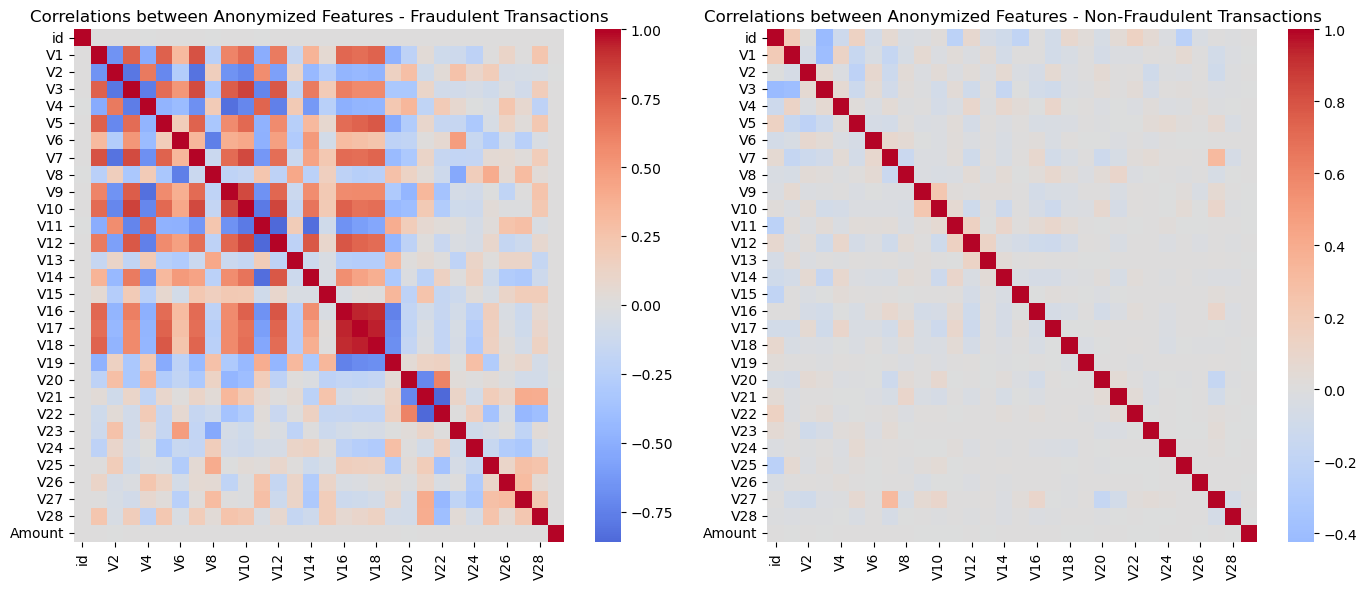

In [56]:
# Separate fraudulent and non-fraudulent transactions
fraudulent_data = df[df['Class'] == 1].drop(columns=['Class'])
non_fraudulent_data = df[df['Class'] == 0].drop(columns=['Class'])

# Calculate correlations for fraudulent transactions
fraudulent_correlations = fraudulent_data.corr()

# Calculate correlations for non-fraudulent transactions
non_fraudulent_correlations = non_fraudulent_data.corr()

# Plot heatmaps for correlations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Correlations between Anonymized Features - Fraudulent Transactions')
sns.heatmap(fraudulent_correlations, cmap='coolwarm', center=0)

plt.subplot(1, 2, 2)
plt.title('Correlations between Anonymized Features - Non-Fraudulent Transactions')
sns.heatmap(non_fraudulent_correlations, cmap='coolwarm', center=0)

plt.tight_layout()
plt.show()


* features V21-V28 have no correlation with fraudalent transcation


To get correalation of various features

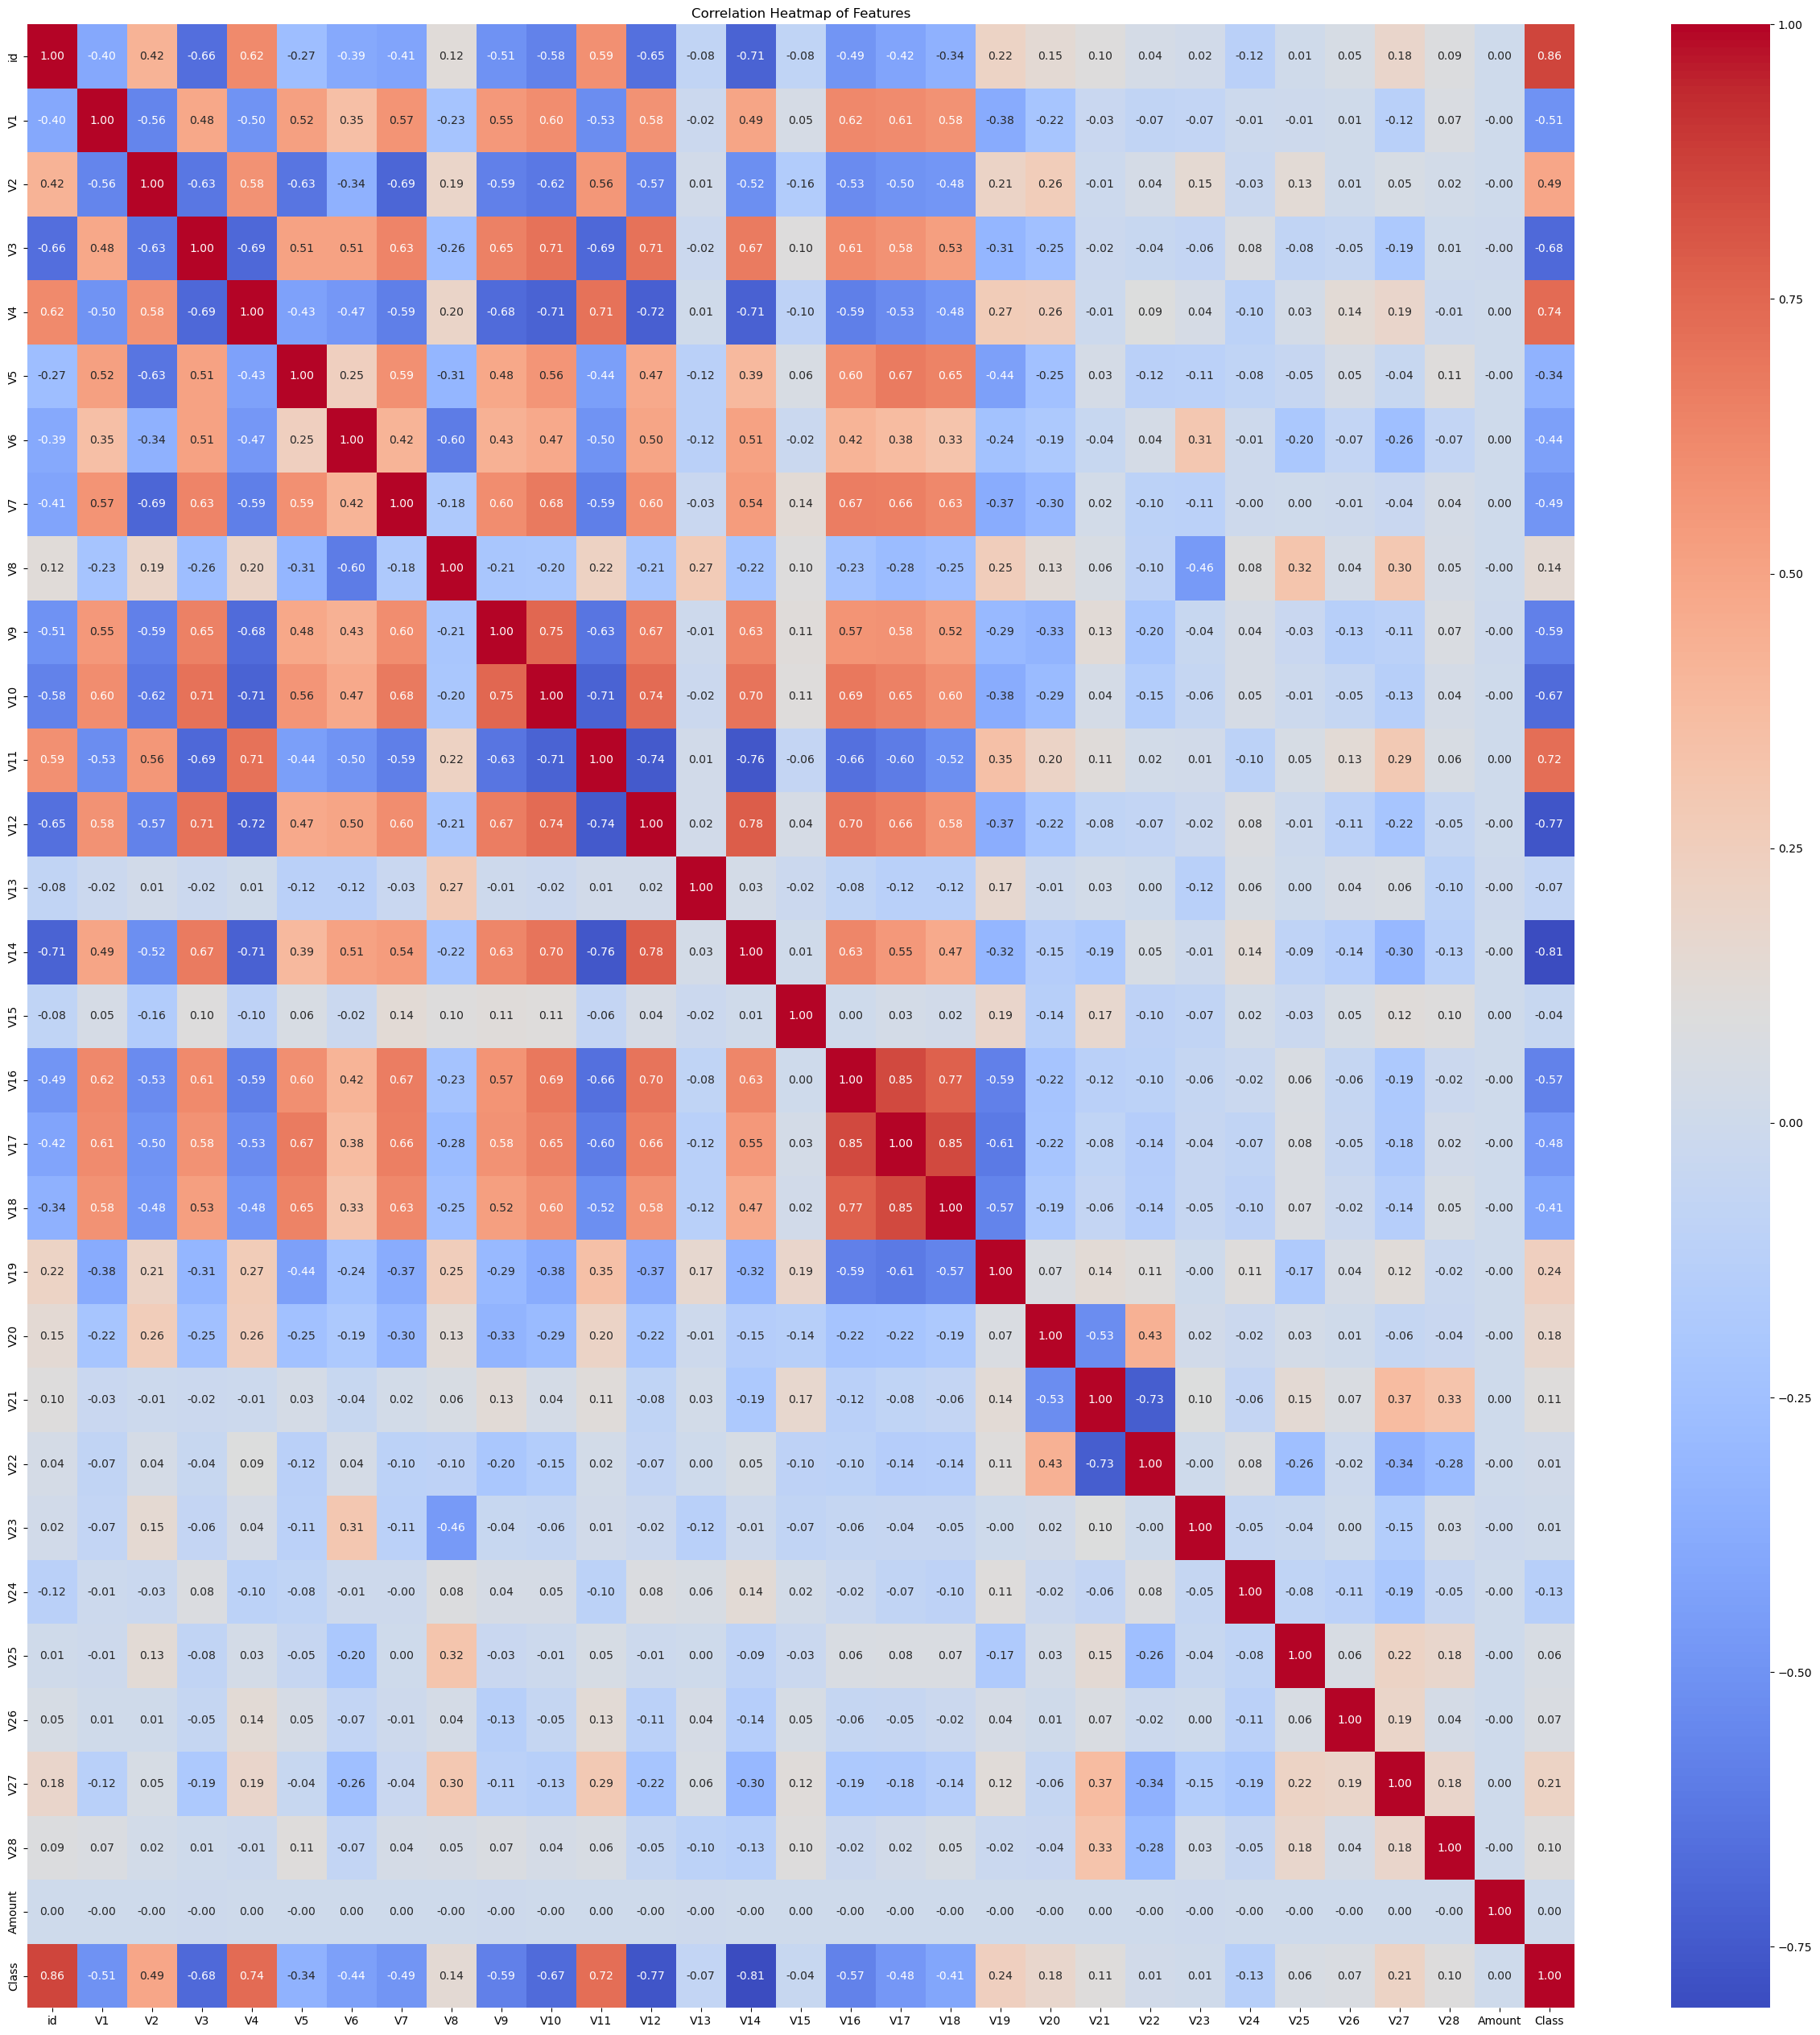

In [57]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(31, 32))

# Draw the heatmap with a color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()


* 'V4', 'V11', and 'V2' demonstrate strong positive correlations, indicating higher values might imply potential fraud.
* 'V1', 'V3', 'V9', 'V10', 'V12', 'V14', and 'V16' exhibit moderate negative correlations with fraud, suggesting lower values might relate to non-fraudulent transactions. 
*  'Amount' shows minimal direct association with fraud

In [58]:
# Assuming 'Class' column represents fraudulent (1) and non-fraudulent (0) transactions
fraudulent_mean = df[df['Class'] == 1]['Amount'].mean()
non_fraudulent_mean = df[df['Class'] == 0]['Amount'].mean()

print(f"Mean transaction amount for fraudulent transactions: {fraudulent_mean}")
print(f"Mean transaction amount for non-fraudulent transactions: {non_fraudulent_mean}")


Mean transaction amount for fraudulent transactions: 12057.601763361063
Mean transaction amount for non-fraudulent transactions: 12026.313505794627


* mean transaction amount for fraud and non fraud is quiet close to each other

To get the top correlated features with the class

Top correlated features with 'Class':
Class    1.000000
id       0.864283
V4       0.735981
V11      0.724278
V2       0.491878
dtype: float64


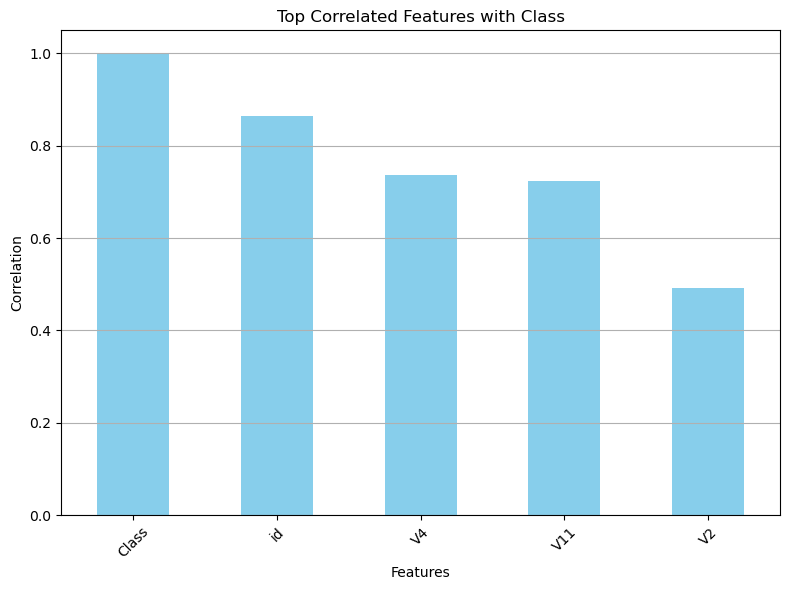

In [59]:
# Calculate correlations of features with 'Class' column
correlations = df.corrwith(df['Class']).sort_values(ascending=False)

# Display the top correlated features
top_features = correlations.head(5)  # Choose the top features
print("Top correlated features with 'Class':")
print(top_features)

# Assuming 'correlations' contains the top correlated features with 'Class'

plt.figure(figsize=(8, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top Correlated Features with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


* V4, V11 and V2 exhibits postive correlation with the class,  indicating a considerable impact on identifying fraudulent transactions.

In [76]:
df.isna().sum()

id         0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount    50
Class      0
dtype: int64

Insertion of missing values to handle missing values


In [68]:

# Assuming 'df' is your DataFrame

# Introduce 5 missing value rows
missing_indices = np.random.choice(df.shape[0], 5, replace=False)
df_missing = df.copy()
df_missing.iloc[missing_indices] = np.nan



In [69]:
missing_indices

array([410560, 207468, 316356,    383, 511180])

In [70]:
df.shape

(568630, 31)

In [77]:
df.iloc[missing_indices]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
410560,410560,-0.467091,0.352890,-0.659247,0.750849,-0.304382,-0.349843,-0.683988,0.336361,-0.777451,...,0.211157,-0.240533,-0.513274,-1.276022,0.620705,-0.004936,1.397757,0.543086,22888.62,1
207468,207468,1.603230,-0.339601,0.183468,0.597064,0.418001,0.630898,0.426054,-0.129214,0.028115,...,0.021584,0.833696,-0.072502,-0.710877,0.185008,0.568185,-0.290107,-0.261255,10127.79,0
316356,316356,-0.387231,-0.055468,-0.652310,0.759903,-0.560504,-0.185858,-0.386236,0.126126,-0.917420,...,0.338666,-0.341315,-0.098770,-0.481680,0.660525,1.979282,0.950813,1.317867,15267.01,1
383,383,0.051422,-0.211435,1.916150,-0.279260,0.407601,0.413861,0.726186,-0.179449,0.257882,...,-0.094859,0.358867,-0.039959,0.992180,-1.344463,1.366872,-0.286615,-0.212394,8200.87,0
511180,511180,-0.377394,0.026415,-0.229060,0.176872,0.294450,-0.733094,0.143042,-0.230786,0.270947,...,-0.105535,-0.489242,0.158080,0.237449,-0.297709,-2.405227,-0.743353,1.469716,23460.18,1


In [71]:

# Displaying results
df_missing.iloc[missing_indices]



,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
410560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_missing.isna().sum()

id         5
V1         5
V2         5
V3         5
V4         5
V5         5
V6         5
V7         5
V8         5
V9         5
V10        5
V11        5
V12        5
V13        5
V14        5
V15        5
V16        5
V17        5
V18        5
V19        5
V20        5
V21        5
V22        5
V23        5
V24        5
V25        5
V26        5
V27        5
V28        5
Amount    55
Class      5
dtype: int64

In [ ]:
df.isduplicates()

In [64]:

missing_rows = df[df.isnull().any(axis=1)]
missing_col


            id        V1        V2        V3        V4        V5        V6  \
1826      1826 -0.246196 -0.154224  1.673847 -0.644329  0.183110  0.356215   
4794      4794 -0.117796 -0.147961  2.130455 -0.325762  0.325616  0.271351   
28344    28344  1.048048 -0.559085  0.615327 -0.476877  0.077899  0.555793   
31974    31974  0.100380 -0.302566  1.051421 -1.003104  0.157562  0.630618   
35303    35303 -0.247323 -0.211047  1.250432 -0.404014  0.372625  0.886330   
37898    37898 -0.239565 -0.914608  2.236272 -0.153059  0.143797  0.637981   
62882    62882 -0.330014 -0.161835  1.288293 -0.591877  0.289209 -0.283643   
82024    82024  1.042058 -0.320411  0.623508 -0.338210  0.137914 -0.151251   
82367    82367 -0.294221 -0.972846  1.972505 -1.439339 -0.306559  1.360050   
119222  119222 -0.022058 -0.389200  2.216154 -0.257053 -0.031860  0.468300   
123536  123536 -0.413357 -0.450377  1.184996 -0.378135  1.009580  1.385973   
125566  125566 -0.002348 -0.693476  2.084688 -1.635707 -0.226145